# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('../data/survey_clean_rick.csv')
df.head()

Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                               1     0   2.0  3.0   
1  21.0    1.52    56.0                               1     0   3.0  3.0   
2  23.0    1.80    77.0                               1     0   2.0  3.0   
3  27.0    1.80    87.0                               0     0   3.0  3.0   
4  22.0    1.78    89.8                               0     0   2.0  1.0   

   SMOKE  CH2O  SCC  ...  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0      0   2.0    0  ...                0               1        0   
1      1   3.0    1  ...                0               1        0   
2      0   2.0    0  ...                0               1        0   
3      0   2.0    0  ...                0               1        0   
4      0   2.0    0  ...                0               1        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0                0               0        1            0                 0   
1                0               1        0            0                 0   
2                1               0        0            0                 0   
3                1               0        0            0                 0   
4                0               1        0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0  

[5 rows x 24 columns]

In [3]:
df['BMI'] = df['Weight'] / (df['Height']**2)
df.head()

Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                               1     0   2.0  3.0   
1  21.0    1.52    56.0                               1     0   3.0  3.0   
2  23.0    1.80    77.0                               1     0   2.0  3.0   
3  27.0    1.80    87.0                               0     0   3.0  3.0   
4  22.0    1.78    89.8                               0     0   2.0  1.0   

   SMOKE  CH2O  SCC  ...  CAEC_Sometimes  CAEC_no  CALC_Frequently  \
0      0   2.0    0  ...               1        0                0   
1      1   3.0    1  ...               1        0                0   
2      0   2.0    0  ...               1        0                1   
3      0   2.0    0  ...               1        0                1   
4      0   2.0    0  ...               1        0                0   

   CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0               0        1            0                 0   
1               1        0            0                 0   
2               0        0            0                 0   
3               0        0            0                 0   
4               1        0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking        BMI  
0                             1               0  24.386526  
1                             1               0  24.238227  
2                             1               0  23.765432  
3                             0               1  26.851852  
4                             1               0  28.342381  

[5 rows x 25 columns]

In [4]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'BMI'],
      dtype='object')

### KMeans (Height v Weight)

In [5]:
X = df[['Height', 'Weight']]

In [6]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [7]:
df['cluster'] = km.labels_
df.head()

Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                               1     0   2.0  3.0   
1  21.0    1.52    56.0                               1     0   3.0  3.0   
2  23.0    1.80    77.0                               1     0   2.0  3.0   
3  27.0    1.80    87.0                               0     0   3.0  3.0   
4  22.0    1.78    89.8                               0     0   2.0  1.0   

   SMOKE  CH2O  SCC  ...  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  \
0      0   2.0    0  ...        0                0               0        1   
1      1   3.0    1  ...        0                0               1        0   
2      0   2.0    0  ...        0                1               0        0   
3      0   2.0    0  ...        0                1               0        0   
4      0   2.0    0  ...        0                0               1        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0            0                 0                             1   
1            0                 0                             1   
2            0                 0                             1   
3            0                 0                             0   
4            0                 0                             1   

   MTRANS_Walking        BMI  cluster  
0               0  24.386526        2  
1               0  24.238227        2  
2               0  23.765432        0  
3               1  26.851852        0  
4               0  28.342381        0  

[5 rows x 26 columns]

In [8]:
df.cluster.value_counts(normalize = True)

0    0.291331
1    0.253434
2    0.235433
3    0.219801
Name: cluster, dtype: float64

In [9]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[  1.75005909,  71.78133487],
       [  1.79492378, 118.57858793],
       [  1.58749787,  60.13544097],
       [  1.65212491,  97.70844   ]])

In [10]:
centroids = pd.DataFrame(centroids, columns = ['Height', 'Weight'])

centroids

Height      Weight
0  1.750059   71.781335
1  1.794924  118.578588
2  1.587498   60.135441
3  1.652125   97.708440

<Figure size 720x576 with 0 Axes>

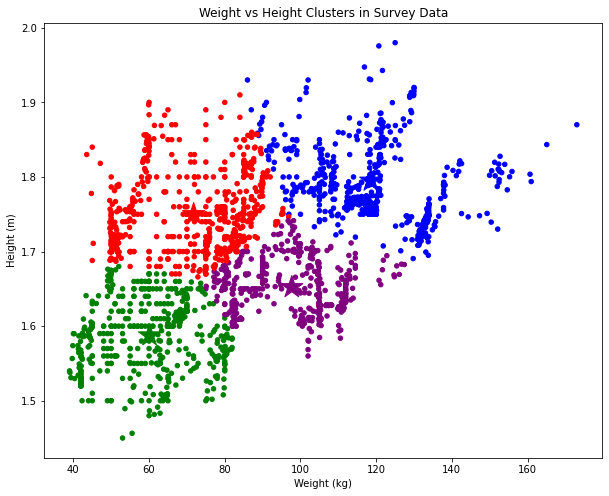

In [11]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green', 'purple']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'Weight', y = 'Height',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'Weight', y = 'Height', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Weight vs Height Clusters in Survey Data')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)');

In [12]:
silhouette_score(X_scaled, km.labels_)

0.4038789184334353

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 1.0, 'Inertia Scores')

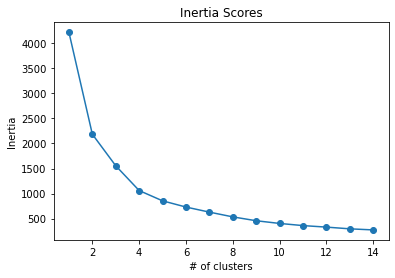

In [13]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

In [14]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'BMI', 'cluster', 'color'],
      dtype='object')

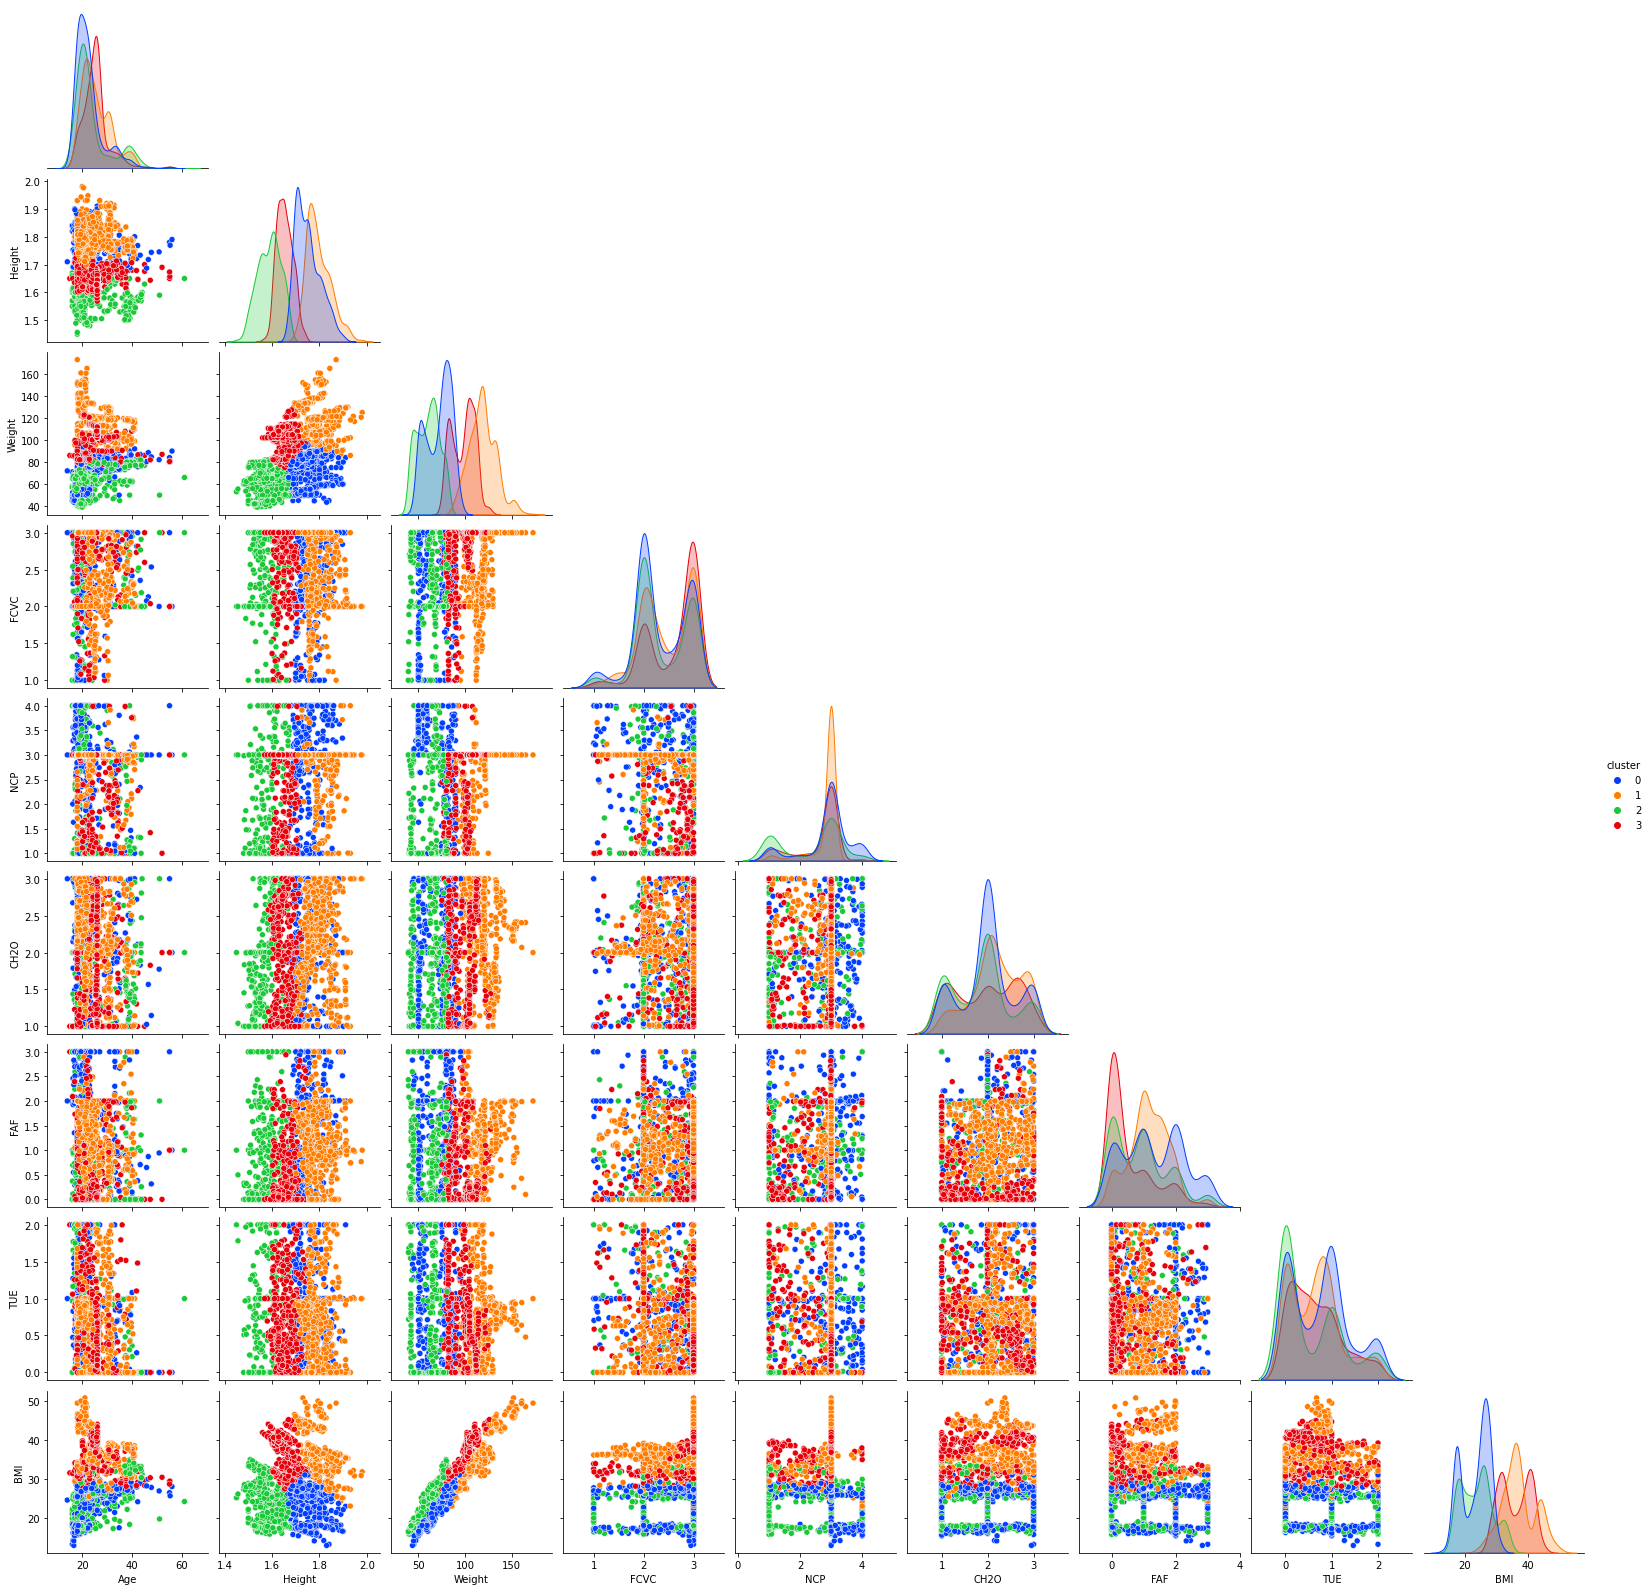

In [15]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]), 
             hue = 'cluster', palette = 'bright', corner = True)

In [16]:
silhouette_list = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
silhouette_list

[0.40539212027091087,
 0.36668452434441656,
 0.4038789184334353,
 0.3900426143538227,
 0.3972122865849636,
 0.4083802628416078,
 0.4081958005845303,
 0.42441895138622804,
 0.4284271490500064]

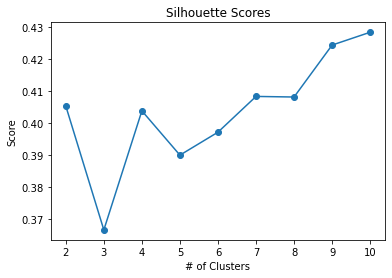

In [17]:
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

___
### KMeans (Age v Weight)

In [18]:
X = df[['Age', 'Weight']]

In [19]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
df['cluster'] = km.labels_
df.head()

Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                               1     0   2.0  3.0   
1  21.0    1.52    56.0                               1     0   3.0  3.0   
2  23.0    1.80    77.0                               1     0   2.0  3.0   
3  27.0    1.80    87.0                               0     0   3.0  3.0   
4  22.0    1.78    89.8                               0     0   2.0  1.0   

   SMOKE  CH2O  SCC  ...  CALC_Frequently  CALC_Sometimes  CALC_no  \
0      0   2.0    0  ...                0               0        1   
1      1   3.0    1  ...                0               1        0   
2      0   2.0    0  ...                1               0        0   
3      0   2.0    0  ...                1               0        0   
4      0   2.0    0  ...                0               1        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0            0                 0                             1   
1            0                 0                             1   
2            0                 0                             1   
3            0                 0                             0   
4            0                 0                             1   

   MTRANS_Walking        BMI  cluster  color  
0               0  24.386526        2  green  
1               0  24.238227        2  green  
2               0  23.765432        2    red  
3               1  26.851852        0    red  
4               0  28.342381        2    red  

[5 rows x 27 columns]

In [21]:
df.cluster.value_counts(normalize = True)

2    0.486499
0    0.360493
1    0.153008
Name: cluster, dtype: float64

In [22]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[ 24.28853577, 114.46099424],
       [ 36.261018  ,  85.16158291],
       [ 20.57255489,  66.3789297 ]])

In [23]:
centroids = pd.DataFrame(centroids, columns = ['Age', 'Weight'])
centroids

Age      Weight
0  24.288536  114.460994
1  36.261018   85.161583
2  20.572555   66.378930

<Figure size 720x576 with 0 Axes>

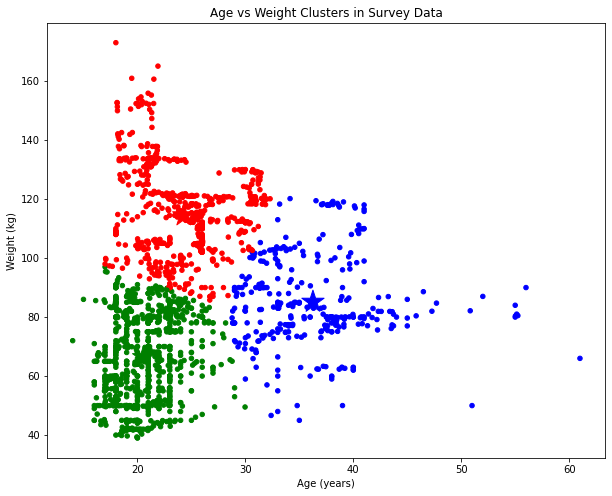

In [24]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'Age', y = 'Weight',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'Age', y = 'Weight', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Age vs Weight Clusters in Survey Data')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)');

In [25]:
silhouette_score(X_scaled, km.labels_)

0.5115603823859582

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 1.0, 'Inertia Scores')

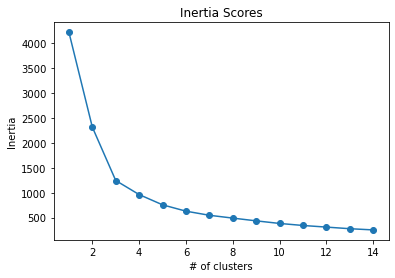

In [26]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

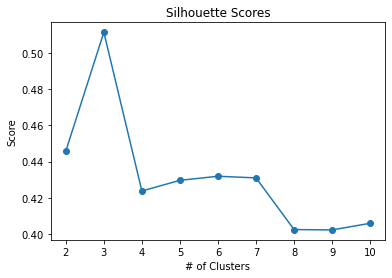

In [27]:
silhouette_list = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

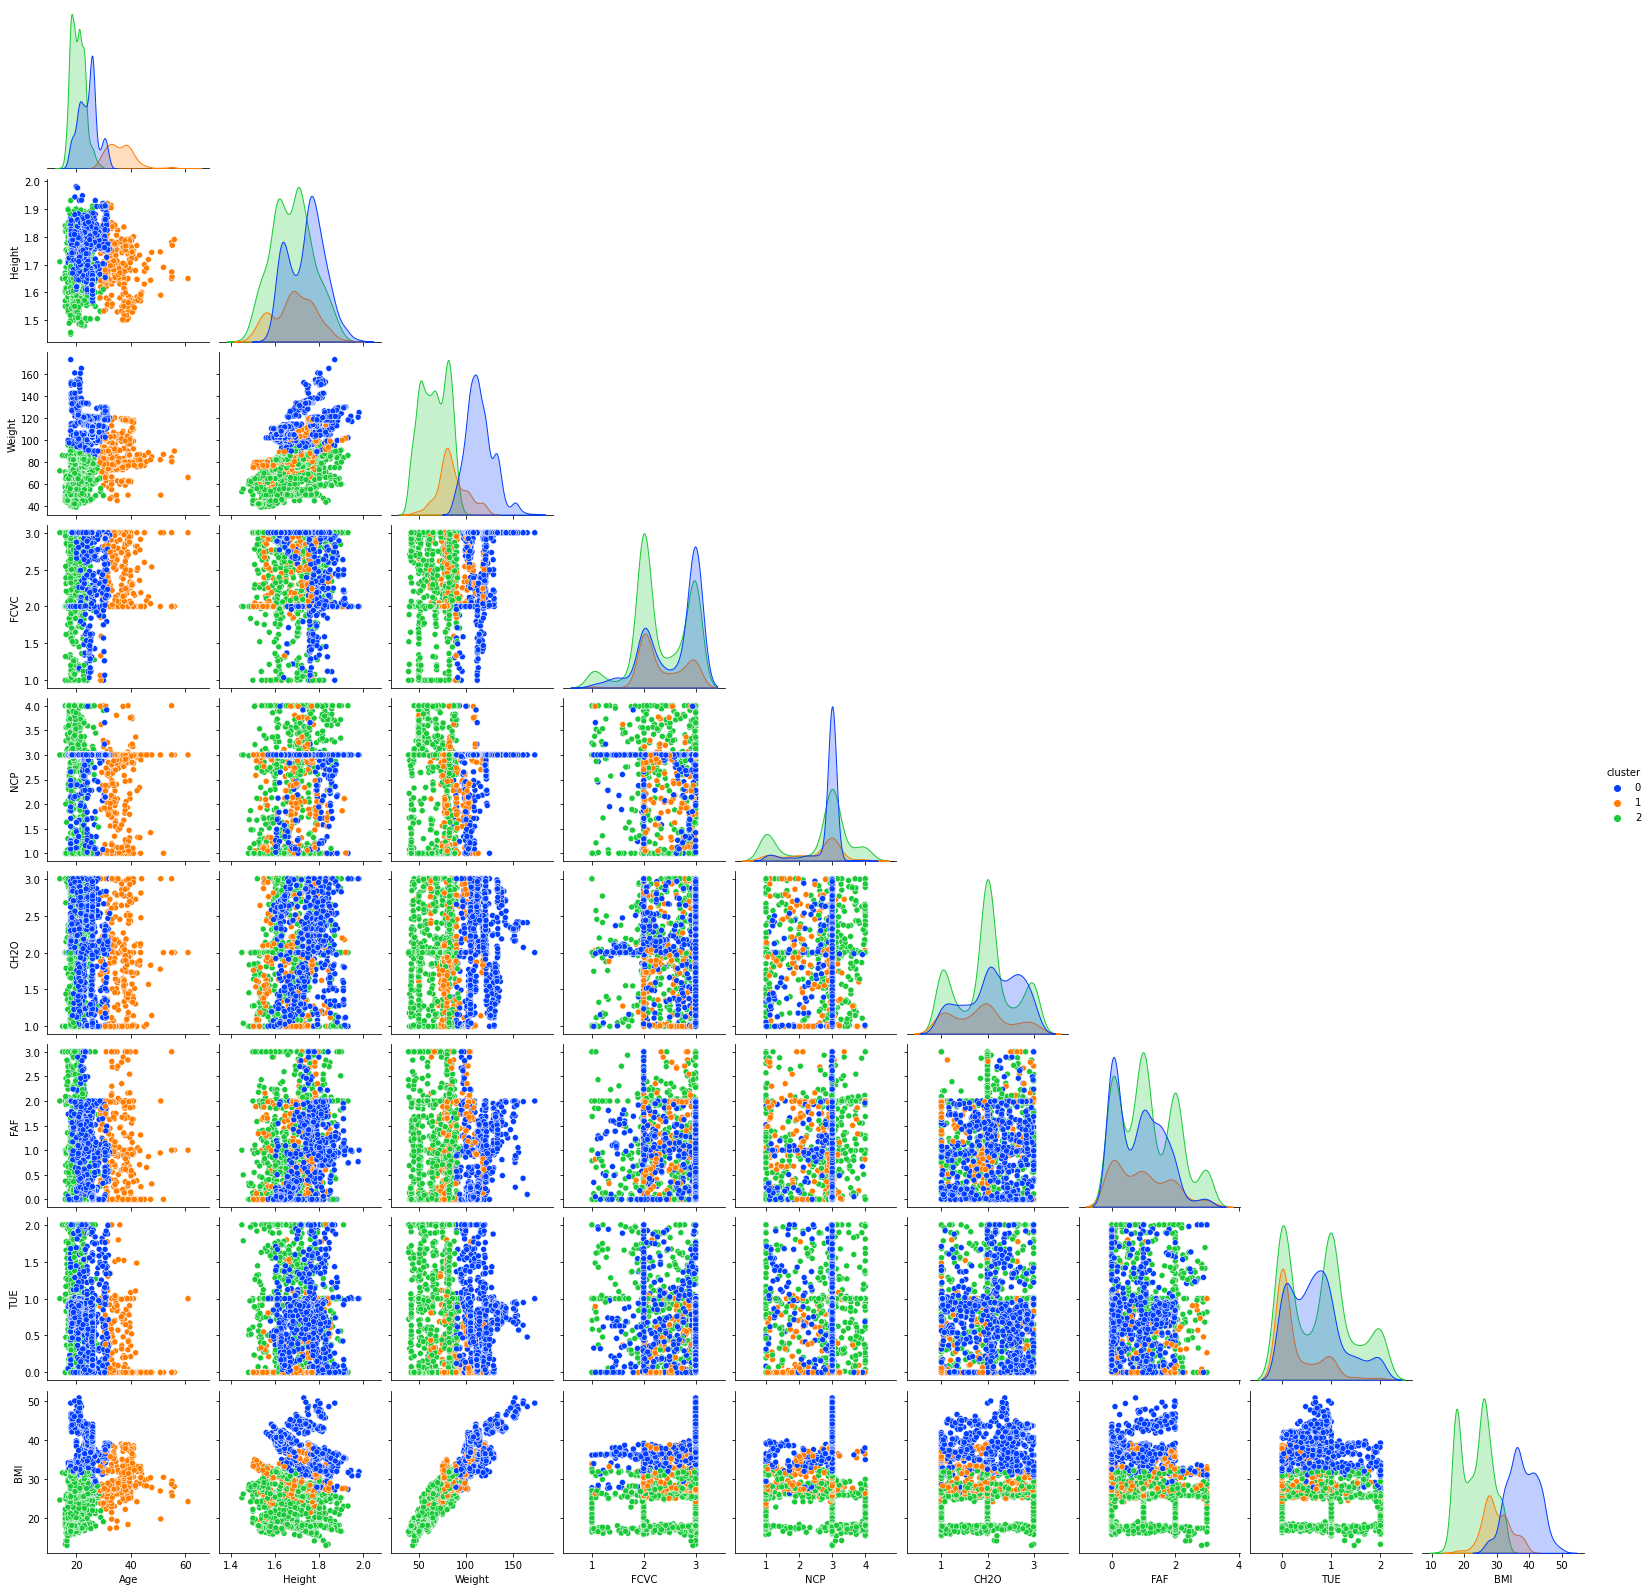

In [28]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]), 
             hue = 'cluster', palette = 'bright', corner = True)

___
### KMeans (Age v BMI)

In [45]:
X = df[['Age', 'BMI']]

In [46]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [47]:
df['cluster'] = km.labels_
df.head()

Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                               1     0   2.0  3.0   
1  21.0    1.52    56.0                               1     0   3.0  3.0   
2  23.0    1.80    77.0                               1     0   2.0  3.0   
3  27.0    1.80    87.0                               0     0   3.0  3.0   
4  22.0    1.78    89.8                               0     0   2.0  1.0   

   SMOKE  CH2O  SCC  ...  CALC_Frequently  CALC_Sometimes  CALC_no  \
0      0   2.0    0  ...                0               0        1   
1      1   3.0    1  ...                0               1        0   
2      0   2.0    0  ...                1               0        0   
3      0   2.0    0  ...                1               0        0   
4      0   2.0    0  ...                0               1        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0            0                 0                             1   
1            0                 0                             1   
2            0                 0                             1   
3            0                 0                             0   
4            0                 0                             1   

   MTRANS_Walking        BMI  cluster  color  
0               0  24.386526        0    red  
1               0  24.238227        0    red  
2               0  23.765432        0    red  
3               1  26.851852        0    red  
4               0  28.342381        0    red  

[5 rows x 27 columns]

In [48]:
df.cluster.value_counts(normalize = True)

0    0.471341
2    0.379441
1    0.149218
Name: cluster, dtype: float64

In [49]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[20.5245266 , 23.20446789],
       [36.42815621, 29.75527778],
       [24.25358956, 37.74741215]])

In [50]:
centroids = pd.DataFrame(centroids, columns = ['Age', 'BMI'])
centroids

Age        BMI
0  20.524527  23.204468
1  36.428156  29.755278
2  24.253590  37.747412

<Figure size 720x576 with 0 Axes>

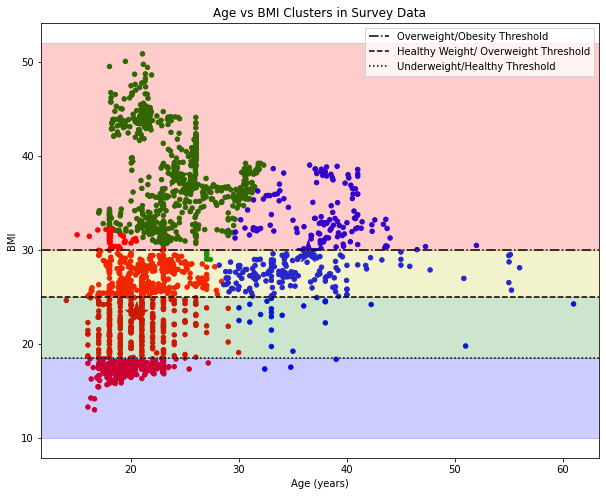

In [85]:
plt.figure(figsize=(10,8))

colors = ['red', 'blue', 'green']
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(kind='scatter', x = 'Age', y = 'BMI',
    figsize=(10,8),c = df['color'])

centroids.plot(kind='scatter', x = 'Age', y = 'BMI', 
    marker='*', c=colors, s=550, ax=ax)

plt.title('Age vs BMI Clusters in Survey Data')
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.axhline(y = 30, color = 'black', linestyle = '-.', label = 'Overweight/Obesity Threshold')
plt.axhline(y= 25, color = 'black', linestyle = '--', label = 'Healthy Weight/ Overweight Threshold')
plt.axhline(y = 18.5, color = 'black', linestyle = ':', label = 'Underweight/Healthy Threshold')
plt.axhspan(30, 52, 0, 65, color='red', alpha = 0.2)
plt.axhspan(25, 30, 0, 65, color='y', alpha = 0.2)
plt.axhspan(18.5, 25, 0, 65, color='g', alpha = 0.2)
plt.axhspan(10, 18.5, 0, 65, color='b', alpha = 0.2)
plt.legend(fancybox = False);

In [86]:
silhouette_score(X_scaled, km.labels_)

0.49406107924653264

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 1.0, 'Inertia Scores')

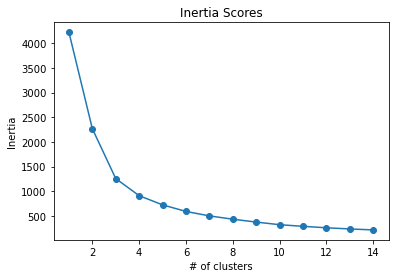

In [87]:
inertia_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,15), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

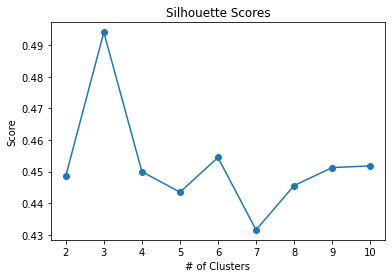

In [88]:
silhouette_list = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

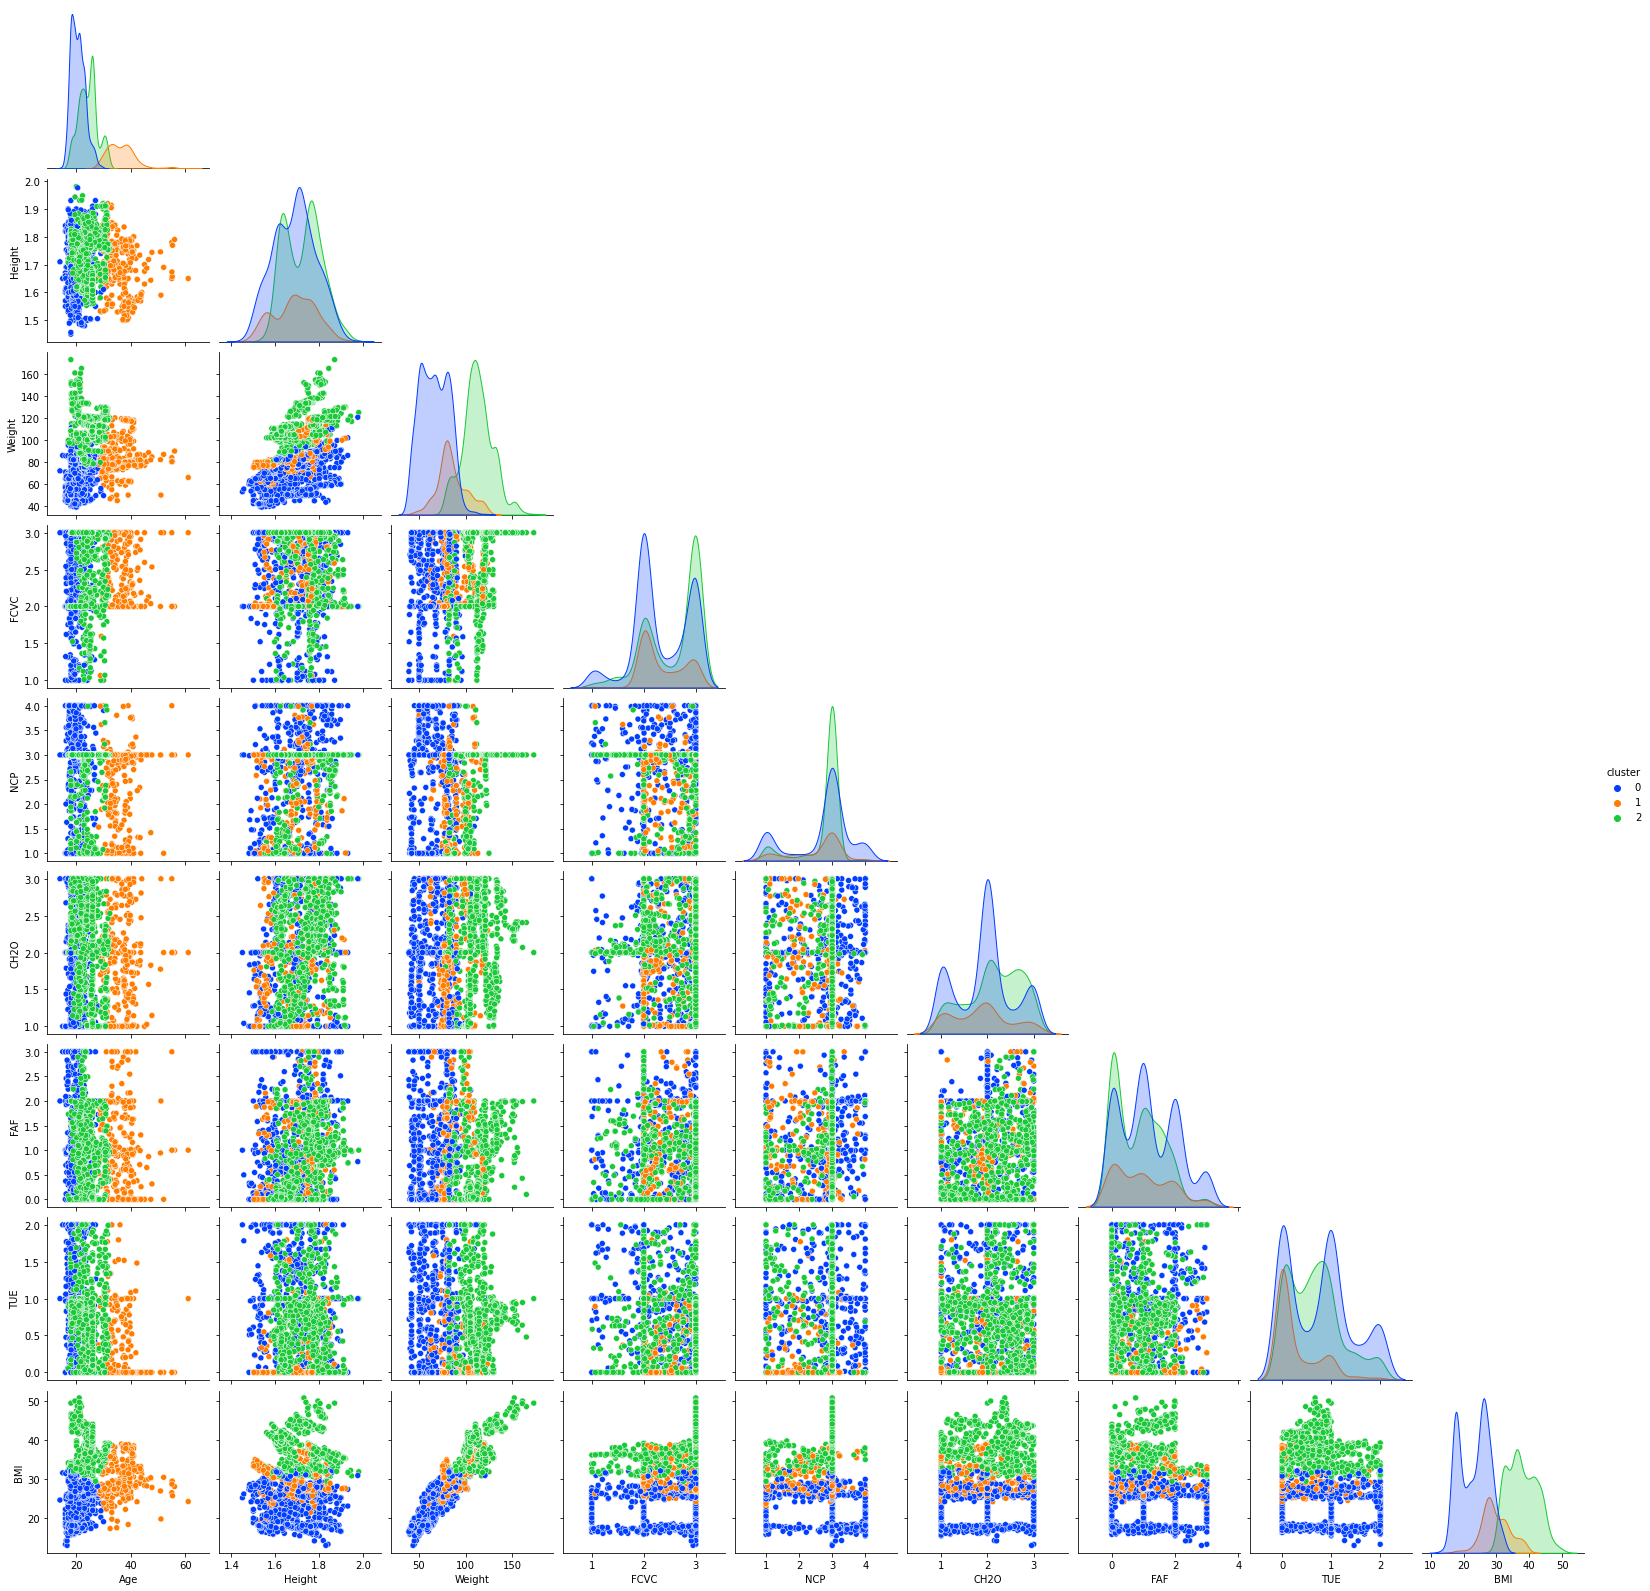

In [89]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]), 
             hue = 'cluster', palette = 'bright', corner = True)

___
#### DBSCAN
Not the best because there is no clear separation of clusters within the dataset

In [90]:
dbscan = DBSCAN(eps = 0.175)
dbscan.fit(X_scaled)

DBSCAN(eps=0.175)

In [91]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1,  1,  2,  3,  4], dtype=int64)

In [92]:
silhouette_score(X_scaled, dbscan.labels_)

-0.11943063979531328

In [93]:
df['cluster'] = dbscan.labels_

df.cluster.value_counts(normalize = True)

 0    0.964472
-1    0.021791
 3    0.007106
 1    0.002369
 4    0.002369
 2    0.001895
Name: cluster, dtype: float64

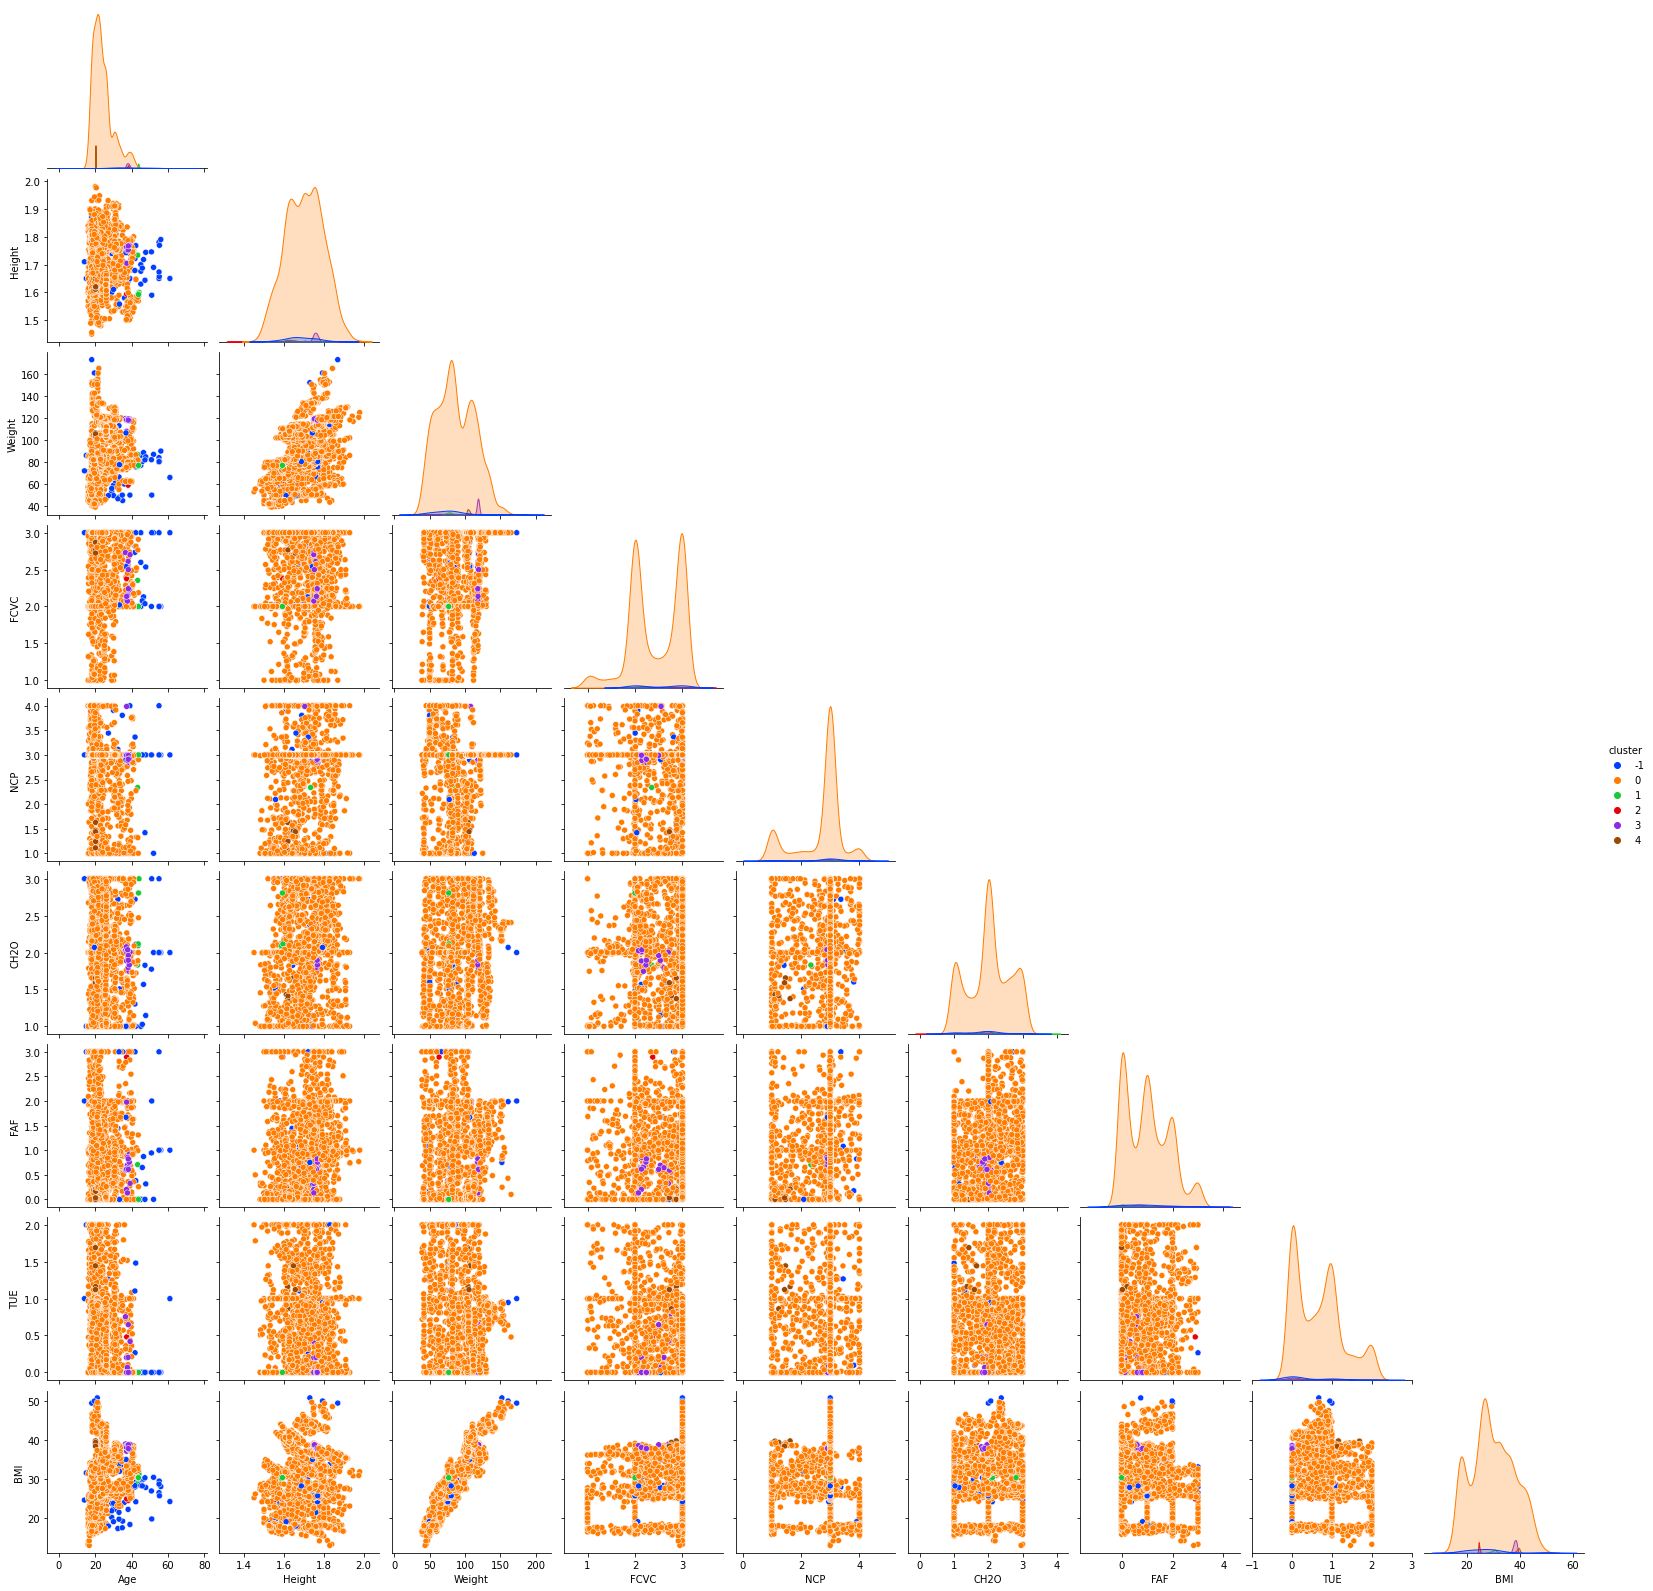

In [94]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]),
             hue = 'cluster', palette = 'bright', corner = True);